<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/10_Time_series_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series forecasting fundamentals with tensorflow + Milestone Project: 3

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2024-05-24 11:22:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.03s   

2024-05-24 11:22:05 (5.23 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd
df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', index_col=['Date'], parse_dates=['Date'])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
df.columns = ['currency', 'close', 'opne', 'high', 'low']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   currency  2787 non-null   object 
 1   close     2787 non-null   float64
 2   opne      2787 non-null   float64
 3   high      2787 non-null   float64
 4   low       2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
df.columns

Index(['currency', 'close', 'opne', 'high', 'low'], dtype='object')

In [7]:
df.isnull().sum()

currency    0
close       0
opne        0
high        0
low         0
dtype: int64

In [8]:

# Only want closing price for each day
bf = pd.DataFrame(df["close"]).rename(columns={"close": "price"})
bf.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


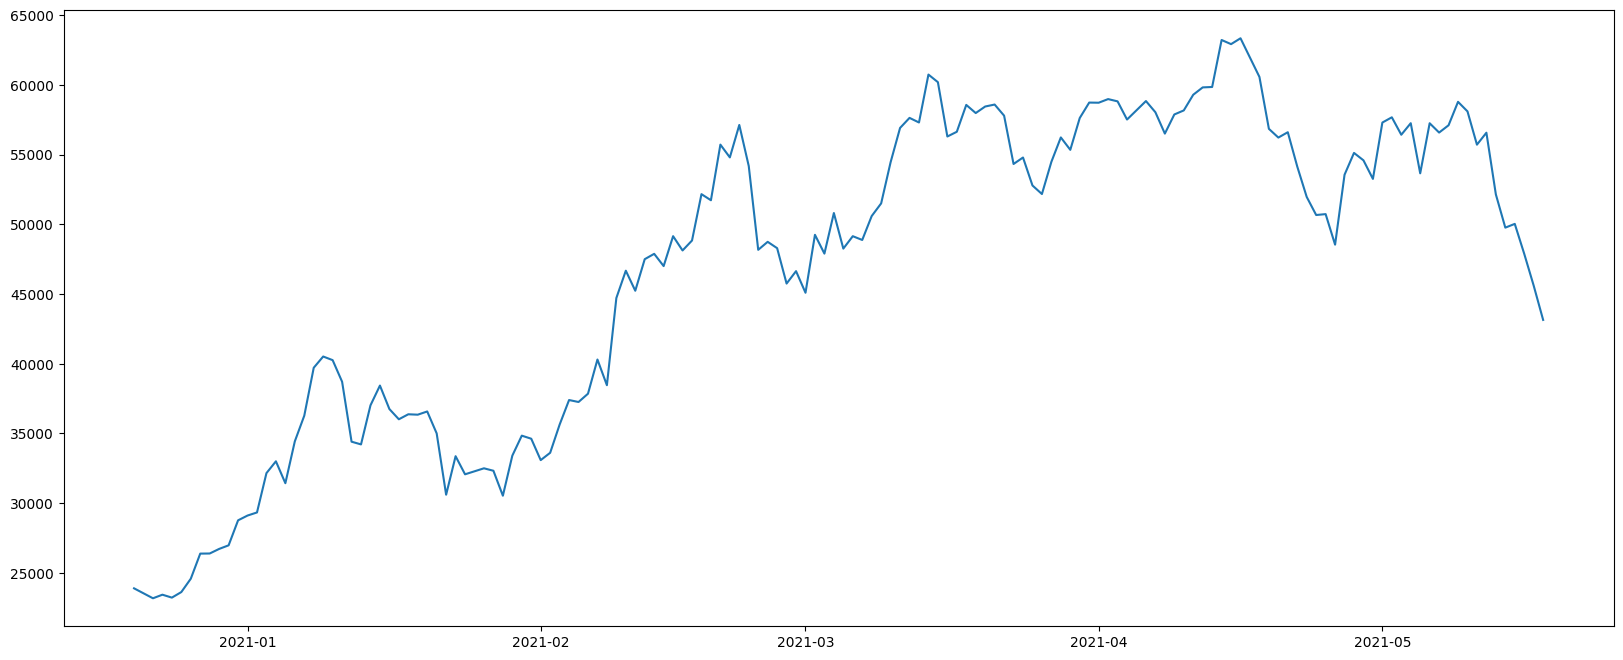

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.plot(df.index[-150:], df['close'][-150:])

##Split the dataset

In [10]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

In [11]:
from sklearn.model_selection import train_test_split

X = df.index
y = df.close

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
len(X_train), len(X_test)

(2229, 558)

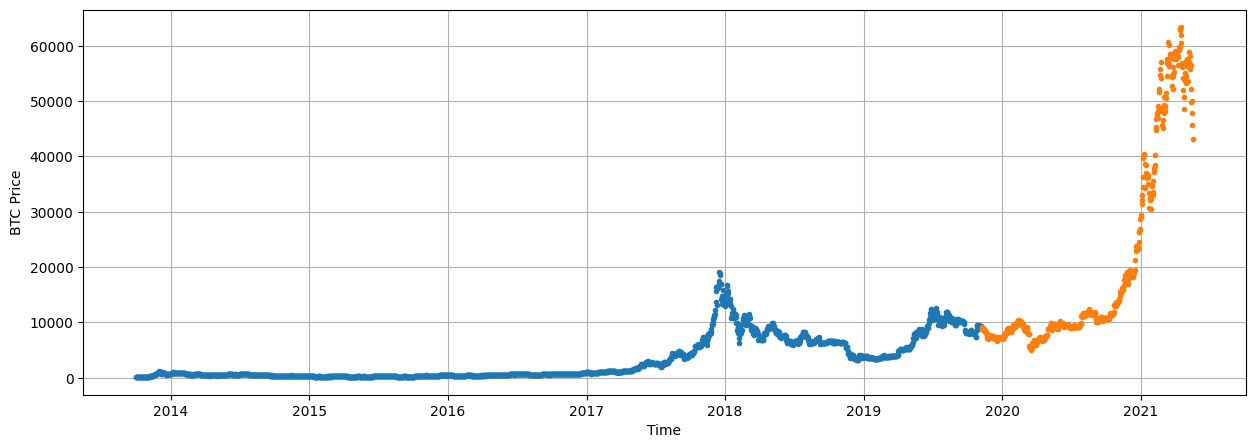

In [12]:
plt.figure(figsize=(15, 5))
plot_time_series(X_train, y_train)
plot_time_series(X_test, y_test)

##Model Experiments

Termes to be fimilier with:
* **Horizen**: number of timesteps into the future we're going to predict.
* **Window size**: number of timesteps we are going to use to predict.

Models:
* 1.Naive Bayes (baseline)
* 2.Dense Model (Horizen=1, window=7)
* 3.Same as Model2 (Horizen=1, window=30)
* 4.Same as Model2 (Horizen=7, window=30)
* 5.Conv1D
* 6.LSTM
* 7.Same as Model 2 but with multivariet data
* 8.N-BEATS algorithm
* 9.Ensemble (multiple models stacked togather)
* 10.Future prediction model
* 11.Same as Model 1

### Model_1 Naive Bayes Model

Formula:
$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous timestep) - This is the Horizen of 1.

In [13]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(Date
 2019-11-08    9226.485821
 2019-11-09    8794.358645
 2019-11-10    8798.042055
 2019-11-11    9081.186878
 2019-11-12    8711.534339
 2019-11-13    8760.892718
 2019-11-14    8749.520591
 2019-11-15    8656.970922
 2019-11-16    8500.643558
 2019-11-17    8469.260899
 Name: close, dtype: float64,
 Date
 2021-05-08    57107.120672
 2021-05-09    58788.209679
 2021-05-10    58102.191426
 2021-05-11    55715.546651
 2021-05-12    56573.555472
 2021-05-13    52147.821187
 2021-05-14    49764.132082
 2021-05-15    50032.693137
 2021-05-16    47885.625255
 2021-05-17    45604.615754
 Name: close, dtype: float64)

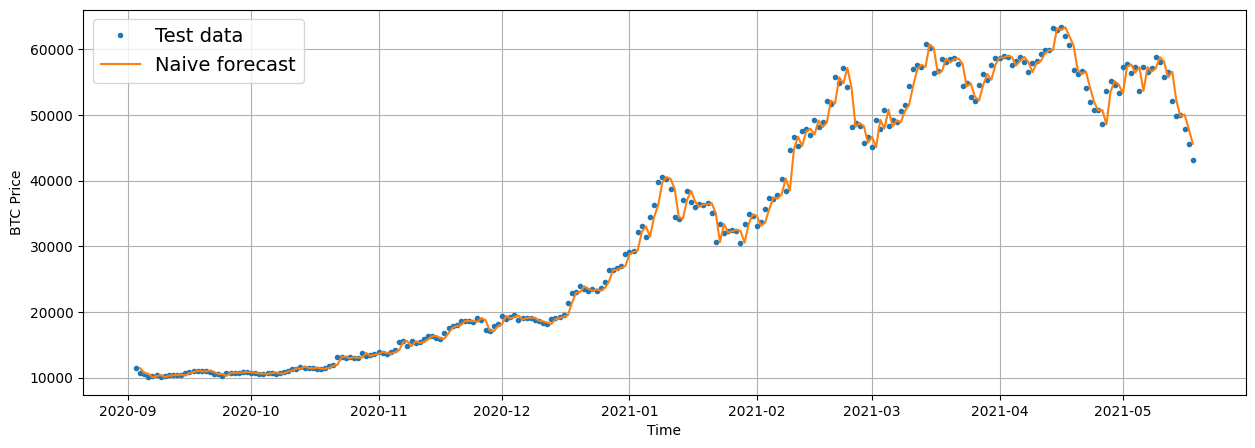

In [14]:
# Plot naive forecast
plt.figure(figsize=(15, 5))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, start=300, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], start=300, values=naive_forecast, format="-", label="Naive forecast")

### Some common Evaluating metrics
* MAE - Mean Absolute error
* MSE - Mean Squared error
* Root MSE - root(MSE)
* Mean Absolute Percentage Error
* Mean Absolute Scaled Error (MASE)

>Resourse: https://otexts.com/fpp3/accuracy.html#percentage-errors


In [15]:
import tensorflow as tf

In [16]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [17]:
mean_absolute_scaled_error(y_test[1:].values, naive_forecast.values).numpy()

0.9995699939182624

In [18]:
## Creating the evaluation matrix function
def calculate_evaluation_metrics(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [19]:
naive_bayes_eval = calculate_evaluation_metrics(y_test[1:].values, naive_forecast.values)
naive_bayes_eval

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

## Format Dataset: Windowing our dataset

In [20]:
btc_price = df.close.to_numpy()

In [21]:
btc_price

array([  123.65499   ,   125.455     ,   108.58483   , ...,
       47885.62525472, 45604.61575361, 43144.47129086])

In [22]:
print(f"We want to use {btc_price[:7]}, to predict this: {btc_price[7]}")

We want to use [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ], to predict this: 123.033


In [23]:
HORIZON = 1
WINDOW = 7

In [24]:
def get_labelled_window(x, horizon=HORIZON):
  return x[:, :-horizon], x[: , -horizon:]

In [25]:
data, label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))

In [26]:
tf.squeeze(data[0]).numpy(), tf.squeeze(label[0]).numpy()

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), 7)

In [27]:
data = tf.squeeze(data).numpy()
label = tf.squeeze(label).numpy()

In [28]:
data, label

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), 7)

In [29]:
prices = btc_price

In [30]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [31]:
full_windows, full_labels = make_windows(btc_price, window_size=WINDOW, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [32]:
## View first 3
for i in range(3):
  print(full_windows[i], full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


### Turning the windows and labels into train_data and test_data


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels, test_size=0.2, shuffle=False)
len(X_train), len(X_test)

(2224, 556)

### Building model checkpoint

In [34]:
import os
def model_checkpoint(model_name, path='model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(os.path.join(path, model_name),
                                            save_best_only=True,
                                            save_freq='epoch')

## Model_1: Dense model with window=7, horizon=1

In [35]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 128, activation='relu'),
    tf.keras.layers.Dense(units=HORIZON, activation='linear')
])

model.compile(loss='mae',
              optimizer='Adam',
              metrics=['mae', 'mse'])

history_1 = model.fit(X_train,
                      y_train,
                      epochs=100,
                      batch_size=128,
                      verbose=0,
                      validation_data=(X_test, y_test),
                      callbacks=[model_checkpoint('model_1')])

In [36]:
model_1 = tf.keras.models.load_model('model_experiment/model_1/')
model_1.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 564.8824 - mae: 564.8824 - mse: 1150478.6250


[564.8824462890625, 564.8824462890625, 1150478.625]

In [37]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [38]:
## Making some predictions
model_1_preds = make_preds(model_1, X_test)

18/18 [==============================] - 0s 2ms/step


In [39]:
for i in range(10):
  print(f"Actual: {y_test[i]} Predicted: {model_1_preds[i]}")

Actual: [8798.04205463] Predicted: 8824.576171875
Actual: [9081.18687849] Predicted: 8785.15234375
Actual: [8711.53433917] Predicted: 8994.0244140625
Actual: [8760.89271814] Predicted: 8778.537109375
Actual: [8749.52059102] Predicted: 8773.234375
Actual: [8656.97092235] Predicted: 8657.21484375
Actual: [8500.64355816] Predicted: 8676.1123046875
Actual: [8469.2608989] Predicted: 8532.3349609375
Actual: [8537.33965197] Predicted: 8423.34375
Actual: [8205.80636599] Predicted: 8512.3837890625


In [40]:
y_test.shape, model_1_preds.shape

((556, 1), TensorShape([556]))

In [41]:
calculate_evaluation_metrics(tf.squeeze(y_test), model_1_preds)

{'mae': 564.88257,
 'mse': 1150479.2,
 'rmse': 1072.604,
 'mape': 2.5338058,
 'mase': 0.99234223}

In [42]:
naive_bayes_eval

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

In [43]:
len(naive_forecast.index), len(y_test)

(557, 556)

In [44]:
naive_forecast[-1], y_test[-2]

(45604.6157536131, array([45604.61575361]))

In [45]:
y_test.shape,

((556, 1),)

In [46]:
len(y_test), len(model_1_preds)

(556, 556)

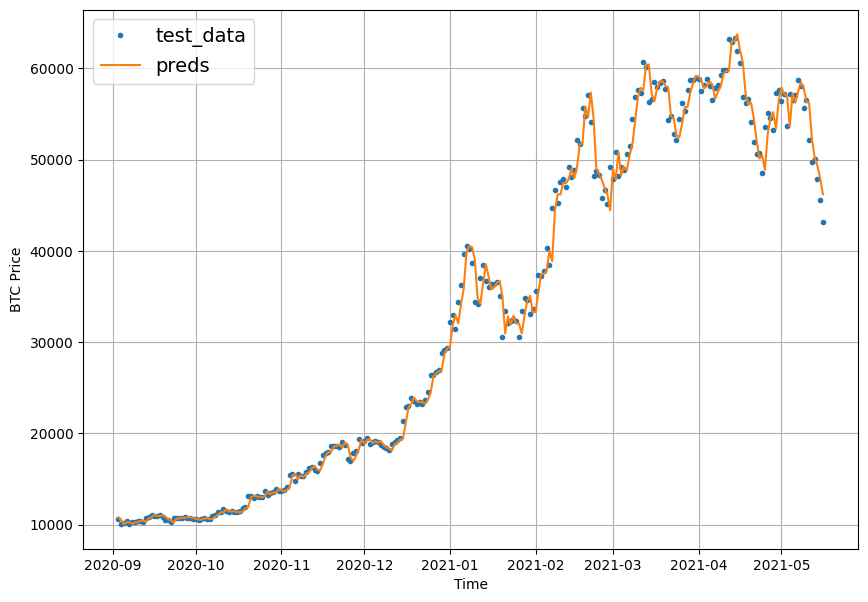

In [47]:
## Plotting the model performance
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=naive_forecast.index[:-1],
                 values = tf.squeeze(y_test),
                 start=offset,
                 label='test_data')

plot_time_series(timesteps=naive_forecast.index[:-1],
                 values=model_1_preds,
                 label='preds',
                 start=offset,
                 format='-')

## Model_2: Dense (WINDOW=30 HORIZON=1)

In [48]:
HORIZON = 1
WINDOW_SIZE = 30

In [49]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
full_windows[0], full_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499]))

In [80]:
## Dividing it into training and testing
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels, test_size=0.2, shuffle=False)
len(X_train), len(X_test)

(2200, 551)

In [55]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

model_2.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae', 'mse'])

history_2 = model_2.fit(X_train, y_train,
                        epochs=100,
                        batch_size=128,
                        verbose=0,
                        validation_data=(X_test, y_test),
                        callbacks=[model_checkpoint("Model_2")])

In [56]:
model_2.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 610.9742 - mae: 610.9742 - mse: 1271505.6250


[610.9741821289062, 610.9741821289062, 1271505.625]

In [71]:
model_2 = tf.keras.models.load_model('/content/model_experiment/Model_2')

In [72]:
model_2.evaluate(X_test, y_test)

18/18 [==============================] - 0s 6ms/step - loss: 610.9742 - mae: 610.9742 - mse: 1271505.6250


[610.9741821289062, 610.9741821289062, 1271505.625]

In [73]:
## Making some predictions
model_2_preds = make_preds(model_2, X_test)

18/18 [==============================] - 0s 1ms/step


In [74]:
for i in range(10):
  print(tf.squeeze(y_test[i]).numpy(), model_2_preds[i].numpy())

8749.520591019 8868.876
8656.970922354 8845.535
8500.6435581622 8769.254
8469.2608988992 8615.43
8537.3396519676 8383.223
8205.8063659942 8445.665
8118.4885358003 8148.1997
8074.8431736099 8206.815
7612.7405735024 8256.01
7262.1105349483 7771.139


In [75]:
calculate_evaluation_metrics(tf.squeeze(y_test), model_2_preds)

{'mae': 610.9742,
 'mse': 1271506.0,
 'rmse': 1127.6107,
 'mape': 2.7961872,
 'mase': 1.0679888}

In [76]:
len(model_2_preds), len(y_test), len(naive_forecast.index)

(552, 552, 557)

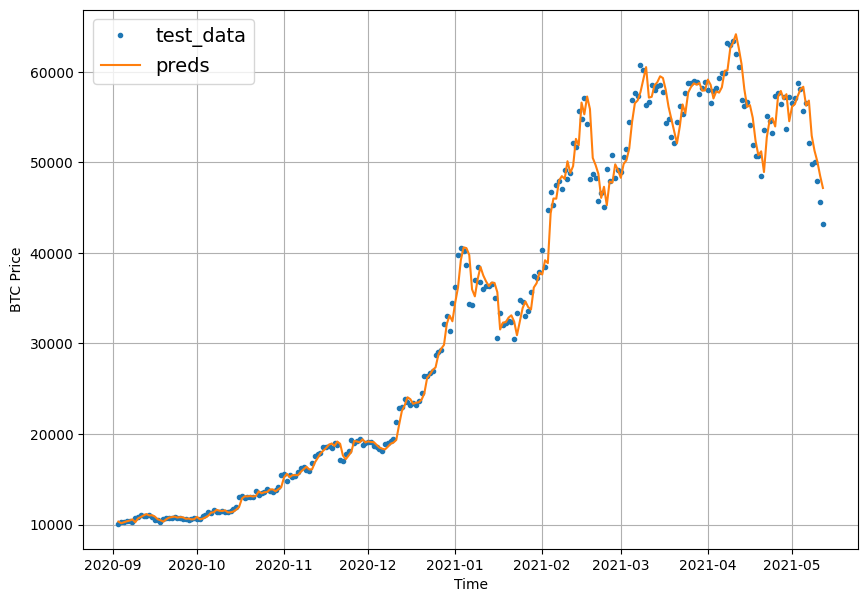

In [77]:
## Plotting the model performance
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=naive_forecast.index[:-5],
                 values = tf.squeeze(y_test),
                 start=offset,
                 label='test_data')

plot_time_series(timesteps=naive_forecast.index[:-5],
                 values=model_2_preds,
                 label='preds',
                 start=offset,
                 format='-')

## Model_3: Dense (WINDOW=30, HORIZON=7)

In [78]:
HORIZON = 7
WINDOW_SIZE = 30

In [79]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
full_windows[0], full_labels[0]

(array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116, 125.27966, 125.9275 ,
        126.38333, 135.24199, 133.20333, 142.76333, 137.92333, 142.95166,
        152.55183, 160.33883, 164.31499, 177.63333, 188.29716, 200.70166,
        180.355  , 175.03166, 177.6965 , 187.15983, 192.75666, 197.4    ]),
 array([196.02499, 198.04883, 198.93233, 200.543  , 210.3075 , 225.02   ,
        248.25333]))

In [81]:
## Dividing it into training and testing
X_train, X_test, y_train, y_test = train_test_split(full_windows, full_labels, test_size=0.2, shuffle=False)
len(X_train), len(X_test)

(2200, 551)

In [82]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
])

model_3.compile(loss='mae',
                optimizer='Adam',
                metrics=['mae', 'mse'])

history_3 = model_3.fit(X_train, y_train,
                        epochs=100,
                        batch_size=128,
                        verbose=0,
                        validation_data=(X_test, y_test),
                        callbacks=[model_checkpoint("Model_3")])

In [83]:
model_3.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1419.9323 - mae: 1419.9323 - mse: 6066692.0000


[1419.9322509765625, 1419.9322509765625, 6066692.0]

In [84]:
model_3 = tf.keras.models.load_model('/content/model_experiment/Model_3')

In [85]:
model_3.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1241.5369 - mae: 1241.5369 - mse: 5400974.0000


[1241.536865234375, 1241.536865234375, 5400974.0]

In [86]:
## Making some predictions
model_3_preds = make_preds(model_3, X_test)

18/18 [==============================] - 0s 1ms/step


In [87]:
for i in range(10):
  print(tf.squeeze(y_test[i]).numpy(), model_3_preds[i].numpy())

[8794.35864452 8798.04205463 9081.18687849 8711.53433917 8760.89271814
 8749.52059102 8656.97092235] [9381.936 9381.925 9413.117 9334.311 9440.32  9142.061 9322.386]
[8798.04205463 9081.18687849 8711.53433917 8760.89271814 8749.52059102
 8656.97092235 8500.64355816] [9058.349 9082.755 9142.678 9152.524 9128.449 8867.344 9068.758]
[9081.18687849 8711.53433917 8760.89271814 8749.52059102 8656.97092235
 8500.64355816 8469.2608989 ] [8806.922 8830.485 9009.707 8987.582 9077.422 9040.558 9030.244]
[8711.53433917 8760.89271814 8749.52059102 8656.97092235 8500.64355816
 8469.2608989  8537.33965197] [8953.803 8940.024 9068.592 9070.288 9082.047 9241.823 9070.528]
[8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989
 8537.33965197 8205.80636599] [8830.21  8704.444 8901.122 8986.799 9011.994 9096.468 9029.612]
[8749.52059102 8656.97092235 8500.64355816 8469.2608989  8537.33965197
 8205.80636599 8118.4885358 ] [8926.854 8785.911 8881.125 8770.506 9215.659 8893.72  9008.439]
[8656

In [93]:
y_test.shape, model_3_preds.shape

((551, 7), TensorShape([551, 7]))

In [88]:
calculate_evaluation_metrics(tf.squeeze(y_test), model_3_preds)

{'mae': array([  551.93567 ,   320.2952  ,   343.06293 ,   434.42047 ,
          395.76675 ,   463.45474 ,   498.1536  ,   495.02322 ,
          408.38162 ,   536.8495  ,   771.4606  ,   780.28864 ,
          898.7152  ,   910.9257  ,   642.81964 ,   206.26332 ,
          255.08768 ,   254.29346 ,   238.10254 ,   292.6499  ,
          179.2456  ,   190.48096 ,   295.86557 ,   279.53348 ,
          137.62549 ,   128.1167  ,   106.416016,   130.03976 ,
          161.50063 ,   173.74442 ,   220.20885 ,   307.38303 ,
          306.78662 ,   306.54395 ,   267.27448 ,   279.26562 ,
          294.11774 ,   222.01472 ,   206.1183  ,   284.16498 ,
          485.6873  ,   143.661   ,   117.91762 ,    62.106792,
           56.98242 ,   137.11621 ,    50.211147,    99.58705 ,
           62.299526,   142.79736 ,   113.94329 ,   101.38142 ,
          137.17564 ,   191.0131  ,   239.98695 ,   422.2122  ,
          530.64276 ,   554.9239  ,   578.89215 ,   522.9027  ,
          360.595   ,   191.51346

### Make our evaluation function work for large horizon

In [98]:
## Creating the evaluation matrix function
def calculate_evaluation_metrics(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [99]:
model_3_preds = make_preds(model_3, X_test)

18/18 [==============================] - 0s 2ms/step


In [100]:
for i in range(10):
  print(y_test[i], model_3_preds[i])

[8794.35864452 8798.04205463 9081.18687849 8711.53433917 8760.89271814
 8749.52059102 8656.97092235] tf.Tensor([9381.936 9381.925 9413.117 9334.311 9440.32  9142.061 9322.386], shape=(7,), dtype=float32)
[8798.04205463 9081.18687849 8711.53433917 8760.89271814 8749.52059102
 8656.97092235 8500.64355816] tf.Tensor([9058.349 9082.755 9142.678 9152.524 9128.449 8867.344 9068.758], shape=(7,), dtype=float32)
[9081.18687849 8711.53433917 8760.89271814 8749.52059102 8656.97092235
 8500.64355816 8469.2608989 ] tf.Tensor([8806.922 8830.485 9009.707 8987.582 9077.422 9040.558 9030.244], shape=(7,), dtype=float32)
[8711.53433917 8760.89271814 8749.52059102 8656.97092235 8500.64355816
 8469.2608989  8537.33965197] tf.Tensor([8953.803 8940.024 9068.592 9070.288 9082.047 9241.823 9070.528], shape=(7,), dtype=float32)
[8760.89271814 8749.52059102 8656.97092235 8500.64355816 8469.2608989
 8537.33965197 8205.80636599] tf.Tensor([8830.21  8704.444 8901.122 8986.799 9011.994 9096.468 9029.612], shape=(7

In [101]:
calculate_evaluation_metrics(tf.squeeze(y_test), model_3_preds)

{'mae': 1241.5371,
 'mse': 5400974.0,
 'rmse': 1421.6168,
 'mape': 5.542421,
 'mase': 2.2092454}

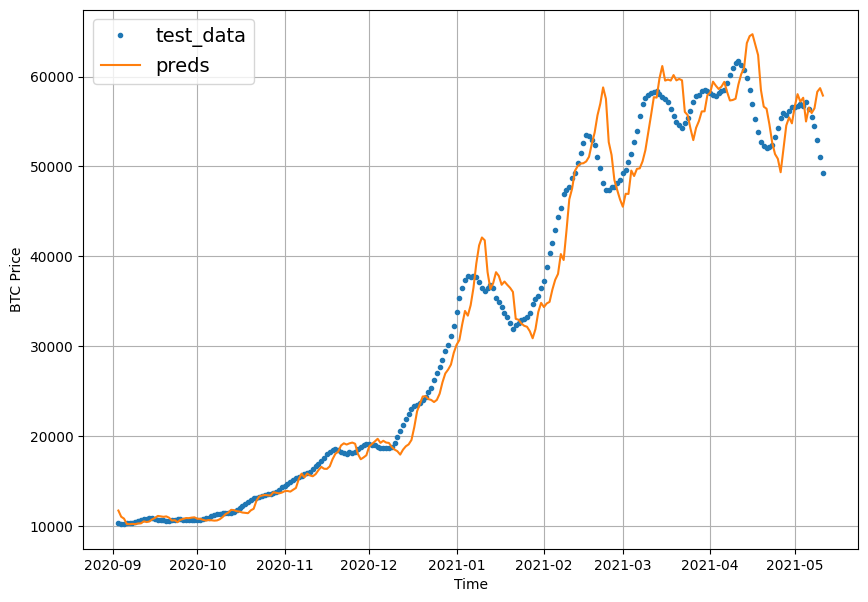

In [111]:
## Plotting the model performance
offset = 300
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=naive_forecast.index[:-6],
                 values = tf.reduce_mean(y_test, axis=1),
                 start=offset,
                 label='test_data')

plot_time_series(timesteps=naive_forecast.index[:-6],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 label='preds',
                 start=offset,
                 format='-')